# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [78]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [79]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                      'address_raw',
                                                      'bfs_number',
                                                      'bfs_name',
                                                      'rooms', 
                                                      'area', 
                                                      'luxurious', 
                                                      'price', 
                                                      'price_per_m2',
                                                      'pop_dens',
                                                      'frg_pct']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",112,Bubikon,3.5,122,1,3180,26.07,632.558140,11.410675
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",112,Bubikon,4.0,87,0,1690,19.43,632.558140,11.410675
2,1662023745-834,"8608 Bubikon, ZH",112,Bubikon,3.5,92,0,2350,25.54,632.558140,11.410675
3,1662023701-503,"8608 Bubikon, ZH",112,Bubikon,3.5,130,0,2500,19.23,632.558140,11.410675
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",261,Zürich,2.5,78,0,3760,48.21,4778.994655,32.458468


### Filter apartments

In [80]:
# Replace the 5000 below by the 10% quantile or 90% quantile to filter apartments
df = df_orig.loc[df_orig['pop_dens'] <= 5000]

### Shape (number of rows and colums)

In [81]:
# Number of rows and columns
print(df.shape)

(870, 11)


### Data types

In [82]:
df.dtypes

web-scraper-order     object
address_raw           object
bfs_number             int64
bfs_name              object
rooms                float64
area                   int64
luxurious              int64
price                  int64
price_per_m2         float64
pop_dens             float64
frg_pct              float64
dtype: object

### Summary statistics of numeric variables

In [83]:
df.describe()

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,185.817241,3.327586,85.202299,0.070115,2296.165517,29.229540,2097.659941,26.860325
std,83.961852,1.103733,33.059531,0.255488,931.786659,12.544119,1647.377220,7.284069
min,2.000000,1.000000,12.000000,0.000000,16.000000,0.120000,82.310984,7.547170
25%,115.500000,2.500000,65.000000,0.000000,1721.250000,21.750000,745.767110,23.009684
50%,224.500000,3.500000,82.000000,0.000000,2090.000000,25.470000,1486.615110,25.994398
75%,261.000000,4.500000,100.000000,0.000000,2600.000000,32.007500,3759.212880,32.458468
max,298.000000,9.000000,300.000000,1.000000,8900.000000,126.330000,4778.994655,46.226483


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [84]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 870 Min: 16 Max: 8900 Mean: 2296.2 Median: 2090.0 Std: 931.8
Area: Count: 870 Min: 12 Max: 300 Mean: 85.2 Median: 82.0 Std: 33.1


### Quantiles

In [85]:
df[['price','rooms', 'area']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area
0.05,1317.25,1.0,34.0
0.10,1480.90,1.5,49.0
0.25,1721.25,2.5,65.0
0.50,2090.00,3.5,82.0
0.75,2600.00,4.5,100.0
0.90,3350.00,4.5,123.0
0.95,4155.00,5.0,140.0


### Skewness

In [86]:
df[['price','rooms', 'area']].skew()

price    2.128949
rooms   -0.106771
area     1.248467
dtype: float64

### Kurtosis

In [87]:
df[['price','rooms', 'area']].kurtosis()

price    7.774685
rooms    0.331077
area     4.924903
dtype: float64

### Extreme values

In [88]:
# Low costs apartments
df[df['price'] <= 1000].head()

,web-scraper-order,address_raw,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
48,1662023723-666,"8001 Zürich, ZH",261,Zürich,4.5,137,0,16,0.12,4778.994655,32.458468
159,1662023723-667,"8001 Zürich, ZH",261,Zürich,4.5,167,0,24,0.14,4778.994655,32.458468
198,1662023798-1237,"Im Holzerhurd 60, 8046 Zürich, ZH",261,Zürich,1.0,38,0,900,23.68,4778.994655,32.458468
363,1662023801-1257,"Einfangstrasse 13, 8406 Winterthur, ZH",230,Winterthur,1.0,27,0,970,35.93,1662.597326,24.535004
381,1662023739-782,"Bergacherstrasse 4, 8630 Rüti ZH, ZH",118,Rüti (ZH),1.0,34,0,850,25.00,1221.272366,24.841283


In [89]:
# Very expansive apartments
df[df['price'] >= 6000].head()

,web-scraper-order,address_raw,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
5,1662023739-771,"Parkring 59, 8002 Zürich, ZH",261,Zürich,5.5,195,1,6900,35.38,4778.994655,32.458468
18,1662023786-1149,"Freudenbergstrasse 94, 8044 Zürich, ZH",261,Zürich,4.5,128,0,6630,51.80,4778.994655,32.458468
36,1662023733-742,"Giessereistrasse 12, 8005 Zürich, ZH",261,Zürich,2.5,282,0,7500,26.60,4778.994655,32.458468
76,1662023771-1030,"Parkring 57, 8002 Zürich, ZH",261,Zürich,5.0,187,1,8900,47.59,4778.994655,32.458468
101,1662023752-871,"Kreuzstrasse 64, 8008 Zürich, ZH",261,Zürich,3.5,125,0,6390,51.12,4778.994655,32.458468


### Get a list of categories of categorical variable

In [90]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Adliswil', 'Affoltern am Albis', 'Andelfingen', 'Bachenbülach',
       'Bassersdorf', 'Bauma', 'Berg am Irchel', 'Birmensdorf (ZH)',
       'Bonstetten', 'Boppelsen', 'Brütten', 'Bubikon', 'Buchs (ZH)',
       'Bäretswil', 'Bülach', 'Dachsen', 'Dielsdorf', 'Dietikon',
       'Dietlikon', 'Dägerlen', 'Dällikon', 'Dänikon', 'Dättlikon',
       'Dübendorf', 'Dürnten', 'Egg', 'Eglisau', 'Elgg', 'Elsau',
       'Embrach', 'Fehraltorf', 'Feuerthalen', 'Flurlingen', 'Fällanden',
       'Geroldswil', 'Glattfelden', 'Gossau (ZH)', 'Greifensee',
       'Hausen am Albis', 'Hedingen', 'Herrliberg', 'Hinwil', 'Hittnau',
       'Hochfelden', 'Hombrechtikon', 'Horgen', 'Hüttikon',
       'Illnau-Effretikon', 'Kappel am Albis', 'Kilchberg (ZH)', 'Kloten',
       'Knonau', 'Küsnacht (ZH)', 'Langnau am Albis', 'Laufen-Uhwiesen',
       'Lindau', 'Lufingen', 'Maschwanden', 'Maur', 'Meilen',
       'Mettmenstetten', 'Männedorf', 'Mönchaltorf', 'Neerach',
       'Niederglatt', 'Niederhasli', 'Niede

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [91]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,9.0
luxurious,,,,,,,,,,,,,
0,39,38,34,137,64,243,50,163,12,26,1,1,1
1,6,7,2,12,0,19,0,11,1,3,0,0,0


### Pivot tables

In [92]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            39   34.666667    39  1383.205128           39  46.377436
      1             6   94.166667     6  2378.333333            6  29.153333
1.5   0            38   49.921053    38  1879.026316           38  48.233684
      1             7  122.428571     7  2311.571429            7  22.212857
2.0   0            34   52.852941    34  1509.441176           34  29.339706
      1             2   95.000000     2  2470.000000            2  27.215000
2.5   0           137   68.124088   137  2256.401460          137  34.053942
      1            12   75.333333    12  2469.500000           12  33.066667
3.0   0            64   68.781250    64  1825.421875           64  27.065625
3.5   0           243   86.567901   243  2296.345679          243  26.739630
      1            19   95.842105    19  2894.000000           19  31.127895
4.0   0            50   87.360000    50  2261.100000           50  26.044000
4.5   0           163  110.417178   163  2608.680982          163  23.929018
      1            11  115.909091    11  3274.363636           11  27.387273
5.0   0            12  119.583333    12  2787.000000           12  22.932500
      1             1  187.000000     1  8900.000000            1  47.590000
5.5   0            26  137.923077    26  2837.923077           26  20.920000
      1             3  158.666667     3  4533.333333            3  28.663333
6.0   0             1  153.000000     1  4240.000000            1  27.710000
6.5   0             1  194.000000     1  4760.000000            1  24.540000
9.0   0             1  300.000000     1  4000.000000            1  13.330000

### Correlation matrix

In [93]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.949679,0.193951,-0.537171,-0.633388,-0.655695
area,0.949679,1.000000,0.491226,-0.246199,-0.359166,-0.386250
price,0.193951,0.491226,1.000000,0.723262,0.636058,0.613277
price_per_m2,-0.537171,-0.246199,0.723262,1.000000,0.992660,0.988774
pop_dens,-0.633388,-0.359166,0.636058,0.992660,1.000000,0.999566
frg_pct,-0.655695,-0.386250,0.613277,0.988774,0.999566,1.000000


### Covariance matrix

In [94]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.218225,24.959545,368.333519,-6.035304,-3.805841e+02,-1.119213
area,24.959545,1092.932561,16794.857156,-194.480413,-7.357821e+03,-29.815350
price,368.333519,16794.857156,868226.377636,3880.858971,6.034625e+05,1500.037394
price_per_m2,-6.035304,-194.480413,3880.858971,157.354924,1.142510e+04,31.206409
pop_dens,-380.584057,-7357.820609,603462.457143,11425.102490,2.713852e+06,7715.924823
frg_pct,-1.119213,-29.815350,1500.037394,31.206409,7.715925e+03,53.057665


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

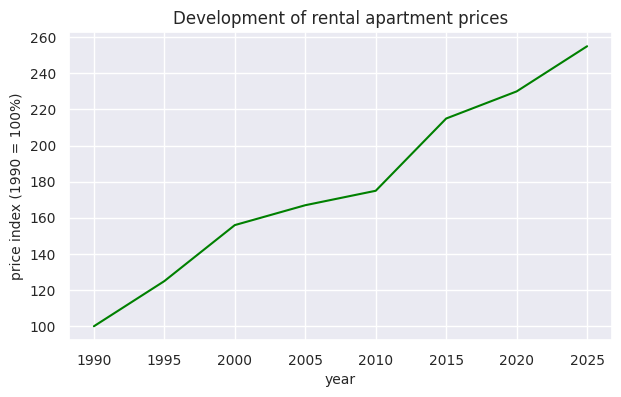

In [95]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

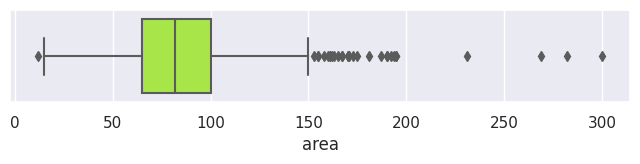

In [96]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

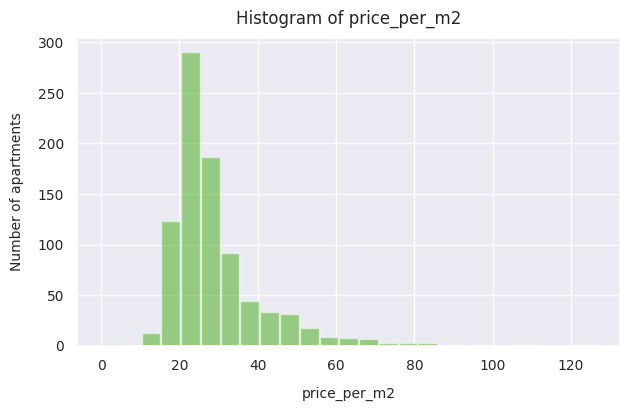

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

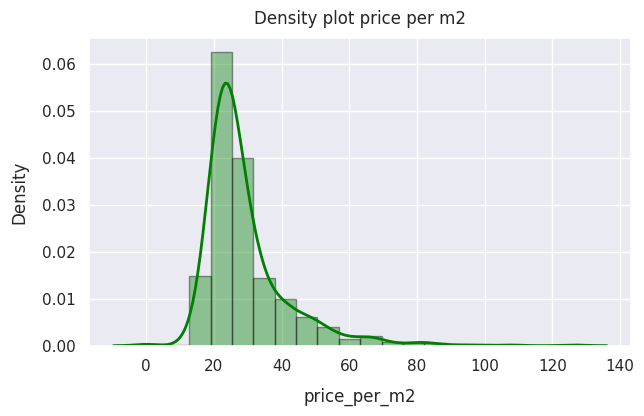

In [98]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

     area       var
696    12 -2.214257
10     15 -2.123512
741    18 -2.032766
393    19 -2.002518
106    20 -1.972269
..    ...       ...
21    195  3.321212
87    231  4.410156
654   269  5.559598
36    282  5.952828
851   300  6.497300

[870 rows x 2 columns]


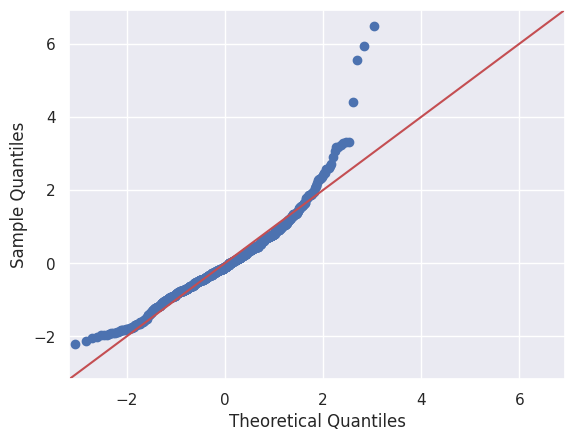

In [99]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [100]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[6.0, 9.0, 6.5, 5.0, 5.5, 2.0, 1.0, 1.5, 4.0, 3.0, 2.5, 4.5, 3.5]

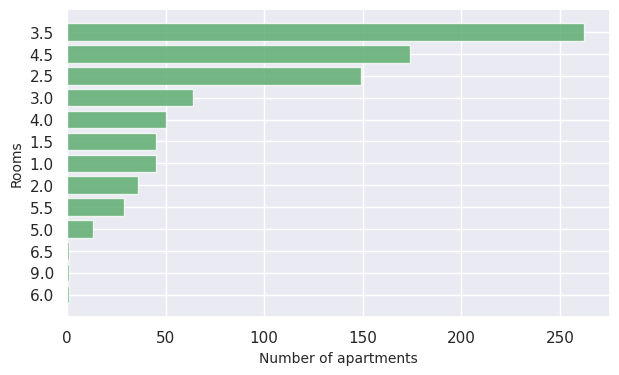

In [101]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

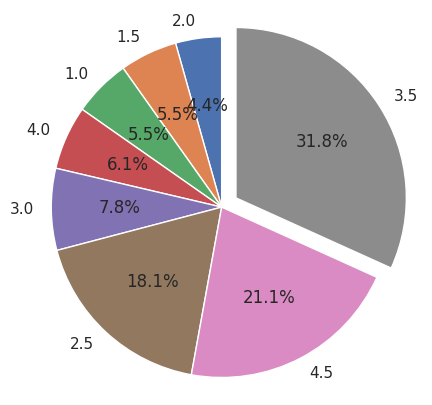

In [102]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

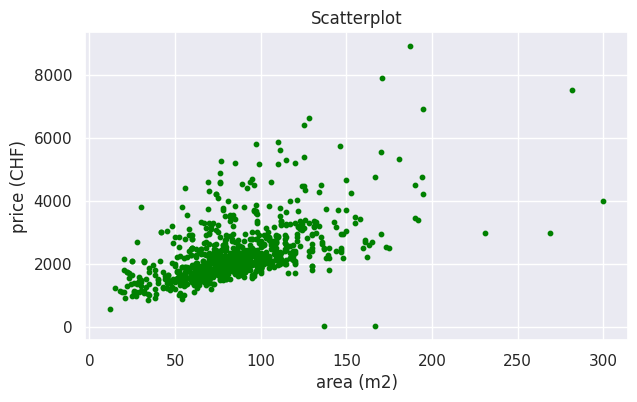

In [103]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(858, 12)
15.532120811276643
987.697687781254


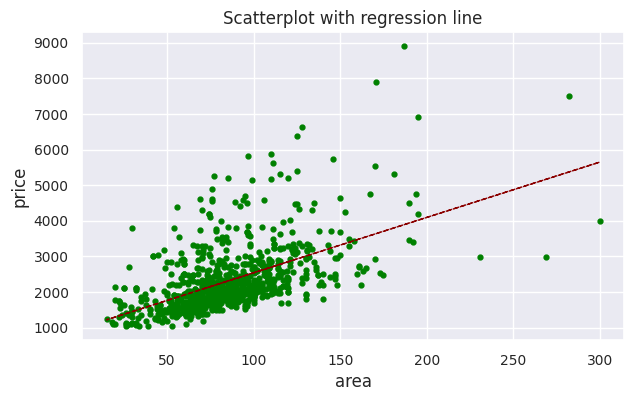

In [104]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

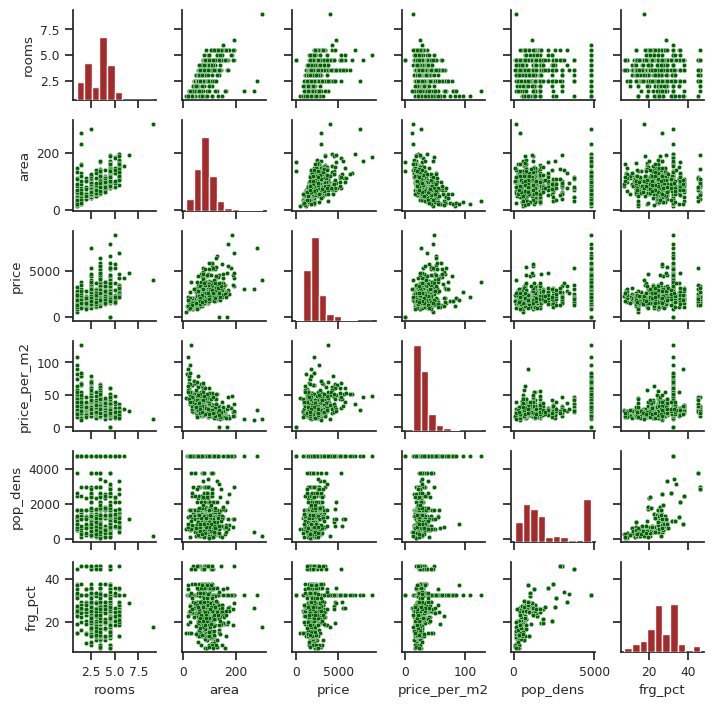

In [105]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(861, 12)


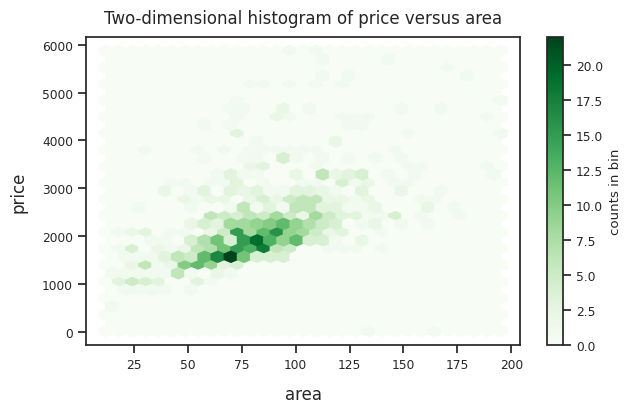

In [106]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

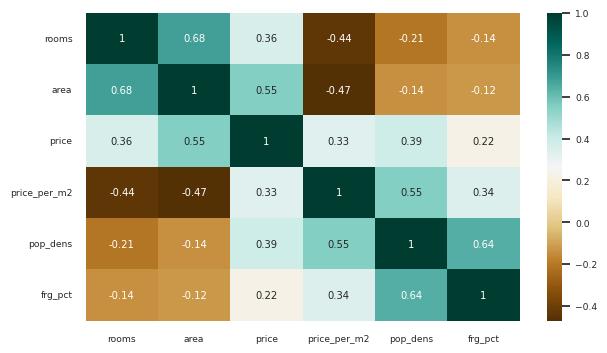

In [107]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

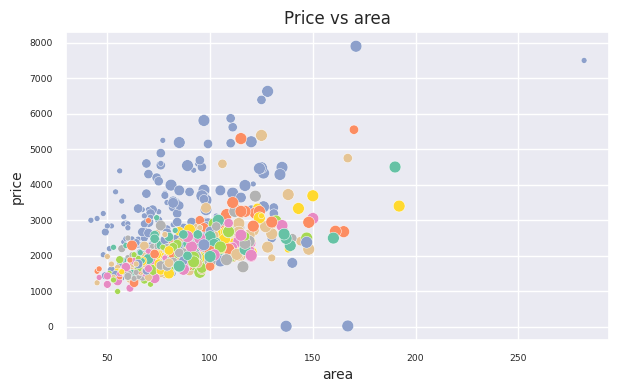

In [108]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [109]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 5.15.0-1041-azure
Datetime: 2023-08-21 09:15:02
Python Version: 3.10.8
-----------------------------------
